# Diabetes Onset Detection -- Modeling 1

## Goal
1. Try different algorithms and build the prediction model, using accuracy as our evaluation metric
    * Naive Bayes
    * K-Nearest Neighbors
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Support Vector Machine
    * Gradient Boosting
2. Compare the performance of different imputation and normalization methods
    * impute with mean
    * impute with median
    * z-score normalization
    * min-max scaling

### Importing useful packages

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

# import model package
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# import customized package
from MLuseful import get_best_model_accuracy
from MLuseful import roc_curve_plot
from MLuseful import print_confusion_matrix

### Loading data
We will load the training and testing set from the feature engineering step and we will be ready to fit the model

In [82]:
diabetes = pd.read_csv('../Data/diabetes_outliers_clean.csv')

# z-score normalization
diabetes_mean_X_train_z = pd.read_csv('../Data/diabetes_mean_X_train_z.csv')
diabetes_mean_X_test_z = pd.read_csv('../Data/diabetes_mean_X_test_z.csv')
diabetes_median_X_train_z = pd.read_csv('../Data/diabetes_median_X_train_z.csv')
diabetes_median_X_test_z = pd.read_csv('../Data/diabetes_median_X_test_z.csv')
diabetes_mean_X_train_z_PCA = pd.read_csv('../Data/diabetes_mean_X_train_z_PCA.csv')
diabetes_median_X_train_z_PCA = pd.read_csv('../Data/diabetes_median_X_train_z_PCA.csv')
diabetes_mean_X_test_z_PCA = pd.read_csv('../Data/diabetes_mean_X_test_z_PCA.csv')
diabetes_median_X_test_z_PCA = pd.read_csv('../Data/diabetes_median_X_test_z_PCA.csv')

# min-max scaling
diabetes_mean_X_train_min_max = pd.read_csv('../Data/diabetes_mean_X_train_min_max.csv')
diabetes_mean_X_test_min_max = pd.read_csv('../Data/diabetes_mean_X_test_min_max.csv')
diabetes_median_X_train_min_max = pd.read_csv('../Data/diabetes_median_X_train_min_max.csv')
diabetes_median_X_test_min_max = pd.read_csv('../Data/diabetes_median_X_test_min_max.csv')
diabetes_mean_X_train_min_max_PCA = pd.read_csv('../Data/diabetes_mean_X_train_min_max_PCA.csv')
diabetes_median_X_train_min_max_PCA = pd.read_csv('../Data/diabetes_median_X_train_min_max_PCA.csv')
diabetes_mean_X_test_min_max_PCA = pd.read_csv('../Data/diabetes_mean_X_test_min_max_PCA.csv')
diabetes_median_X_test_min_max_PCA = pd.read_csv('../Data/diabetes_median_X_test_min_max_PCA.csv')

diabetes_y_train = pd.read_csv('../Data/diabetes_y_train.csv', header=None)
diabetes_y_test = pd.read_csv('../Data/diabetes_y_test.csv', header=None)

Before fitting the model, we need to see the base score we have to beat, the base score is basically calculated by the random guessing of the majority types in outcome variable

In [83]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

From the table above, we can see the baseline score we need to beat is 0.651, since if we predict all the patients have no diabetes, we will get a score of 0.651. We will start to fit different models to find out the best in terms of fitting time, predicting accuracy...etc., we will do the grid search on hyperparameters of the algorithms and find out the best one that gives the highest accuracy, since accuracy might not be enough for the evaluation metrics, we will discuss more about it later, at this time we will use the accuracy score determine the best parameters

#### Naive Bayes
We will first try the simplest algorithm naive bayes, the basic assumptions of the naive bayes is the variables are independent to each other, this is more like an ideal assumption that almost never happens in the real world, but we will still see how it works since the algorithm is simple and fast

We will include all the data we gathered and processed from data cleaning and feature engineering step, there is no need to split the data into training and testing set again since we already did it in previous steps

In [84]:
# data dictionary
data_all_train = {'mean-z-score': diabetes_mean_X_train_z, 'median-z-score': diabetes_median_X_train_z,
'mean-min-max': diabetes_mean_X_train_min_max, 'median-min-max': diabetes_median_X_train_min_max,
'mean-z-score-PCA': diabetes_mean_X_train_z_PCA, 'median-z-score-PCA': diabetes_median_X_train_z_PCA,
'mean-min-max-PCA': diabetes_mean_X_train_min_max_PCA, 'median-min-max-PCA': diabetes_median_X_train_min_max_PCA}

In [85]:
# create a new dictionary to collect all the score and all the best parameters
all_score = {}
all_params = {}

In [86]:
naive = GaussianNB()

# create an empty list to store the scores of naive bayes algorithms
all_score['Naive_Bayes'] = []
all_params['Naive_Bayes'] = []
# specify the hyperparameters we are going to do gridsearch on
naive_params = {'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]}
for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(naive, naive_params, data, diabetes_y_train, score='accuracy')
    all_score['Naive_Bayes'].append(score)
    all_params['Naive_Bayes'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7486033519553073
Best Parameters: {'var_smoothing': 1e-11}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.001


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.74487895716946
Best Parameters: {'var_smoothing': 1e-11}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.001


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7486033519553073
Best Parameters: {'var_smoothing': 1e-11}
Average Time to Fit (s): 0.002
Average Time to Score (s): 0.001


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.74487895716946
Best Parameters: {'var_smoothing': 1e-11}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.001


mean-z-score

It looks like for naive bias, the z-score and min-max method does not have much difference, for the PCA data, it looks like it does not help with the prediction, the accuracy score is lower than without the PCA, we have only tuned one hyperparameter here and it looks like `var_smoothing` = 1e-11 is the best for all models, the best accuracy score we got is 0.7486

#### K-nearest neighbor
Next we will try another simple algorithm called KNN, it basically gather the neighbors that are closest to the one we are predicting and each neighbor got a vote, the majority of the vote result will be the predictive value

In [87]:
knn = KNeighborsClassifier()

# create an empty list to store the scores of knn algorithms
all_score['KNN'] = []
all_params['KNN'] = []
knn_params = {'n_neighbors': [1,3,5,7,9,11]}

for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(knn, knn_params, data, diabetes_y_train, score='accuracy')
    all_score['KNN'].append(score)
    all_params['KNN'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.770949720670391
Best Parameters: {'n_neighbors': 9}
Average Time to Fit (s): 0.002
Average Time to Score (s): 0.002


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.776536312849162
Best Parameters: {'n_neighbors': 11}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.003


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.776536312849162
Best Parameters: {'n_neighbors': 9}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.003


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7783985102420856
Best Parameters: {'n_neighbors': 9}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.002


mean-z-score-PCA
-----------------

Same as naive bayes, PCA data perform worse than the feature engineered data group, note that each data has its own best hyperparameter, the highest accuracy score we got using knn algorithm is 0.7784

#### Logistic Regression
Now we will try the logistic regression, this is a more complicated algorithms than our previous two, it basically utilize the sigmoid function to calculate the probability of an example and use it to predict the outcome value, the default probability is set to be 0.5, when the hypothesis is greater or equal to 0.5, it will predict 1 and 0 otherwise 

In [88]:
lgr = LogisticRegression()

# create an empty list to store the scores of logistic regress algorithms
all_score['Logistic_regression'] = []
all_params['Logistic_regression'] = []
lgr_params = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10]}

for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(lgr, lgr_params, data, diabetes_y_train, score='accuracy')
    all_score['Logistic_regression'].append(score)
    all_params['Logistic_regression'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.770949720670391
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Average Time to Fit (s): 0.004
Average Time to Score (s): 0.001


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.770949720670391
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.001


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7728119180633147
Best Parameters: {'C': 1, 'penalty': 'l2'}
Average Time to Fit (s): 0.008
Average Time to Score (s): 0.001


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7728119180633147
Best Parameters: {'C': 1, 'penalty': 'l2'}
Average Time to Fit (s): 0.006
Average Time to Score (s): 0.001


me

The same trend of PCA data perform worse than feature engineered data still hold in logistic regression, the best score we got here is 0.7728, one thing to note that the average time to fit the model seems slightly longer, this suggest logistic regression algorithm is more complicated than naive bayes and knn

#### Decision tree
We will now test our tree model, this algorithm is different from previous models we fit, it basically uses a certain criteria to separate the data into two groups in each branch, the criteria is based on the maximum information gain 

In [89]:
dt = DecisionTreeClassifier()

# create an empty list to store the scores of tree algorithms
all_score['Decision_tree'] = []
all_params['Decision_tree'] = []

dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [1,3,5,7,9,11],}

for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(dt, dt_params, data, diabetes_y_train, score='accuracy')
    all_score['Decision_tree'].append(score)
    all_params['Decision_tree'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7374301675977654
Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Average Time to Fit (s): 0.005
Average Time to Score (s): 0.001


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7467411545623837
Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Average Time to Fit (s): 0.005
Average Time to Score (s): 0.001


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7430167597765364
Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Average Time to Fit (s): 0.006
Average Time to Score (s): 0.001


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7411545623836127
Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Average Time to Fit (s

Decision tree model has the highest score of 0.7467, it is comparable to the naive bayes model, since this is a single tree model, next we will take multiple trees altogether to improve our performance 

#### Random forest
Random forest algorithm is based on the decision tree, it is an ensemble model that takes the random patch of the data each time and build a decision tree based on that, it then create multiple decision trees and take the maximum voting as the final prediction

In [90]:
rf = RandomForestClassifier()

# create an empty list to store the scores of tree algorithms
all_score['Random_forest'] = []
all_params['Random_forest'] = []

rf_params = {'n_estimators': [10, 50, 100, 500],
             'max_depth': [1,3,5,7,9]}

for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(rf, rf_params, data, diabetes_y_train, score='accuracy')
    all_score['Random_forest'].append(score)
    all_params['Random_forest'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.770949720670391
Best Parameters: {'max_depth': 3, 'n_estimators': 500}
Average Time to Fit (s): 0.181
Average Time to Score (s): 0.018


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7802607076350093
Best Parameters: {'max_depth': 9, 'n_estimators': 50}
Average Time to Fit (s): 0.172
Average Time to Score (s): 0.017


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7783985102420856
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Average Time to Fit (s): 0.174
Average Time to Score (s): 0.017


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7746741154562383
Best Parameters: {'max_depth': 9, 'n_estimators': 100}
Average Time to Fit (s):

We can see that the average score of random forest is better than the decision tree, the best score we can get here is 0.7765, however, we can also see that the average time to fit the model is a lot longer than the decision tree, this is clearly a trade-off between accuracy score and model fitting time

#### Support vector machine
We will next try the support vector machine, this algorithms has a cost function that is modified from logistic regression, the modified version of cost function creates an ideal hyperplance in an n-dimensional space that separates the class with the maximum margin, we will first try the linear support vector machine

In [91]:
# linear support vector machine
lsvc = LinearSVC()

# create an empty list to store the scores of linear support vector machine algorithms
all_score['LSVM'] = []
all_params['LSVM'] = []
lsvc_params = {'C': [0.01, 0.1, 1, 10, 100],
               'penalty': ['l1', 'l2']}
for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(lsvc, lsvc_params, data, diabetes_y_train, score='accuracy')
    all_score['LSVM'].append(score)
    all_params['LSVM'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7653631284916201
Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Average Time to Fit (s): 0.009
Average Time to Score (s): 0.0


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7672253258845437
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Average Time to Fit (s): 0.009
Average Time to Score (s): 0.0


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.776536312849162
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Average Time to Fit (s): 0.007
Average Time to Score (s): 0.0


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7728119180633147
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Average Time to Fit (s): 0.007
Average Time to Score (s): 0.0


mean

The best score we got from linear support vector machine is 0.7765 and we can see that the average fitting time is quite fast, we will next try the non-linear kernel model

In [92]:
# svc with non-linear kernel
svc = SVC()

# create an empty list to store the scores of non-linear support vector machine algorithms
all_score['SVM'] = []
all_params['SVM'] = []
svc_params = {'C': [0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf', 'poly']}
for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(svc, svc_params, data, diabetes_y_train, score='accuracy')
    all_score['SVM'].append(score)
    all_params['SVM'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7635009310986964
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Average Time to Fit (s): 0.016
Average Time to Score (s): 0.001


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7616387337057728
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Average Time to Fit (s): 0.014
Average Time to Score (s): 0.001


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7746741154562383
Best Parameters: {'C': 100, 'kernel': 'poly'}
Average Time to Fit (s): 0.006
Average Time to Score (s): 0.001


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7728119180633147
Best Parameters: {'C': 100, 'kernel': 'poly'}
Average Time to Fit (s): 0.006
Average Time to Score (s): 0.002


The non-linear kernel support vector machine in this case actually has a lower score than the linear svm, the best score we got is 0.7747

#### Gradient boosting
Next we will try another ensemble model called gradient boosting, this algorithm basically use the weak learner model, at first the model will perform badly, however we will use another weak leaner to fit the unexplained residue from the previous weak learner, repeat it in series until we get the final output

In [93]:
gbr = GradientBoostingClassifier()

# create an empty list to store the scores of gradient boosting algorithms
all_score['Gradient_boosting'] = []
all_params['Gradient_boosting'] = []
gbr_params = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
              'n_estimators': [50, 100, 500]}

for name, data in data_all_train.items():
    print(name)
    print('-'*90)
    best, score = get_best_model_accuracy(gbr, gbr_params, data, diabetes_y_train, score='accuracy')
    all_score['Gradient_boosting'].append(score)
    all_params['Gradient_boosting'].append(best)
    print('\n')

mean-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7597765363128491
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Average Time to Fit (s): 0.193
Average Time to Score (s): 0.001


median-z-score
------------------------------------------------------------------------------------------
Best accuracy : 0.7653631284916201
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Average Time to Fit (s): 0.192
Average Time to Score (s): 0.001


mean-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7579143389199255
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Average Time to Fit (s): 0.192
Average Time to Score (s): 0.001


median-min-max
------------------------------------------------------------------------------------------
Best accuracy : 0.7616387337057728
Best Parameters: {'learning_rate': 0.05, 'n_estimators':

We can see that gradient boosting takes a while to fit the model, mostly due to the reason that it fits the weak learner in series, the best score we got is 0.7654

Since we have gather all the scores and parameters from the model we fit, we will show the summary table as below

In [94]:
# creating a dataframe for the score
all_score_accuracy_df = pd.DataFrame(all_score, index=['mean-z-score', 'median-z-score', 'mean-min-max',
                                              'median-min-max', 'mean-z-score-PCA', 'median-z-score-PCA',
                                              'mean-min-max-PCA', 'median-min-max-PCA'])

# add an average column to show the mean score of the data from all algorithms
all_score_accuracy_df['Avg_sscore'] = all_score_accuracy_df.mean(axis=1)
all_score_accuracy_df

,Naive_Bayes,KNN,Logistic_regression,Decision_tree,Random_forest,LSVM,SVM,Gradient_boosting,Avg_sscore
mean-z-score,0.748603,0.770950,0.770950,0.737430,0.770950,0.765363,0.763501,0.759777,0.760940
median-z-score,0.744879,0.776536,0.770950,0.746741,0.780261,0.767225,0.761639,0.765363,0.764199
mean-min-max,0.748603,0.776536,0.772812,0.743017,0.778399,0.776536,0.774674,0.757914,0.766061
median-min-max,0.744879,0.778399,0.772812,0.741155,0.774674,0.772812,0.772812,0.761639,0.764898
mean-z-score-PCA,0.700186,0.728119,0.720670,0.707635,0.754190,0.720670,0.729981,0.744879,0.725791
median-z-score-PCA,0.694600,0.720670,0.726257,0.726257,0.750466,0.720670,0.718808,0.741155,0.724860
mean-min-max-PCA,0.700186,0.731844,0.735568,0.715084,0.756052,0.737430,0.737430,0.737430,0.731378
median-min-max-PCA,0.703911,0.724395,0.737430,0.728119,0.757914,0.737430,0.739292,0.744879,0.734171


In [95]:
all_params_accuracy_df = pd.DataFrame(all_params, index=['mean-z-score', 'median-z-score', 'mean-min-max',
                                              'median-min-max', 'mean-z-score-PCA', 'median-z-score-PCA',
                                              'mean-min-max-PCA', 'median-min-max-PCA'])
all_params_accuracy_df

,Naive_Bayes,KNN,Logistic_regression,Decision_tree,Random_forest,LSVM,SVM,Gradient_boosting
mean-z-score,{'var_smoothing': 1e-11},{'n_neighbors': 9},"{'C': 0.1, 'penalty': 'l1'}","{'criterion': 'gini', 'max_depth': 5}","{'max_depth': 3, 'n_estimators': 500}","{'C': 0.01, 'penalty': 'l2'}","{'C': 1, 'kernel': 'rbf'}","{'learning_rate': 0.05, 'n_estimators': 100}"
median-z-score,{'var_smoothing': 1e-11},{'n_neighbors': 11},"{'C': 0.1, 'penalty': 'l1'}","{'criterion': 'gini', 'max_depth': 5}","{'max_depth': 9, 'n_estimators': 50}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'kernel': 'rbf'}","{'learning_rate': 0.05, 'n_estimators': 100}"
mean-min-max,{'var_smoothing': 1e-11},{'n_neighbors': 9},"{'C': 1, 'penalty': 'l2'}","{'criterion': 'gini', 'max_depth': 5}","{'max_depth': 5, 'n_estimators': 100}","{'C': 0.1, 'penalty': 'l2'}","{'C': 100, 'kernel': 'poly'}","{'learning_rate': 0.01, 'n_estimators': 500}"
median-min-max,{'var_smoothing': 1e-11},{'n_neighbors': 9},"{'C': 1, 'penalty': 'l2'}","{'criterion': 'gini', 'max_depth': 5}","{'max_depth': 9, 'n_estimators': 100}","{'C': 0.1, 'penalty': 'l2'}","{'C': 100, 'kernel': 'poly'}","{'learning_rate': 0.05, 'n_estimators': 100}"
mean-z-score-PCA,{'var_smoothing': 1e-11},{'n_neighbors': 7},"{'C': 0.1, 'penalty': 'l1'}","{'criterion': 'gini', 'max_depth': 3}","{'max_depth': 5, 'n_estimators': 10}","{'C': 0.1, 'penalty': 'l2'}","{'C': 10, 'kernel': 'rbf'}","{'learning_rate': 0.1, 'n_estimators': 50}"
median-z-score-PCA,{'var_smoothing': 1e-11},{'n_neighbors': 7},"{'C': 0.1, 'penalty': 'l1'}","{'criterion': 'entropy', 'max_depth': 5}","{'max_depth': 3, 'n_estimators': 100}","{'C': 1, 'penalty': 'l2'}","{'C': 1, 'kernel': 'rbf'}","{'learning_rate': 0.05, 'n_estimators': 50}"
mean-min-max-PCA,{'var_smoothing': 1e-11},{'n_neighbors': 5},"{'C': 10, 'penalty': 'l2'}","{'criterion': 'gini', 'max_depth': 9}","{'max_depth': 3, 'n_estimators': 50}","{'C': 10, 'penalty': 'l2'}","{'C': 1, 'kernel': 'rbf'}","{'learning_rate': 0.01, 'n_estimators': 100}"
median-min-max-PCA,{'var_smoothing': 1e-11},{'n_neighbors': 7},"{'C': 10, 'penalty': 'l2'}","{'criterion': 'gini', 'max_depth': 3}","{'max_depth': 3, 'n_estimators': 10}","{'C': 10, 'penalty': 'l2'}","{'C': 1, 'kernel': 'rbf'}","{'learning_rate': 0.05, 'n_estimators': 50}"


In [96]:
# sort the average score of all algorithms
all_score_accuracy_df.mean().sort_values(ascending=False)

Random_forest          0.765363
Gradient_boosting      0.751629
Logistic_regression    0.750931
KNN                    0.750931
SVM                    0.749767
LSVM                   0.749767
Avg_sscore             0.746537
Decision_tree          0.730680
Naive_Bayes            0.723231
dtype: float64

In [97]:
# sort the average score of all data
all_score_accuracy_df['Avg_sscore'].sort_values(ascending=False)

mean-min-max          0.766061
median-min-max        0.764898
median-z-score        0.764199
mean-z-score          0.760940
median-min-max-PCA    0.734171
mean-min-max-PCA      0.731378
mean-z-score-PCA      0.725791
median-z-score-PCA    0.724860
Name: Avg_sscore, dtype: float64

Looks like we have a winner here if we just take the average score of all the data, the random forest algorithm outperforms the other algorithm and the simple algorithm naive bayes, as expected, has the average lowest score. From the processed data point of view, we can see that the `mean-min-max` data has the highest score among all and the PCA method in general has the lower score than the feature engineering method 

Our next step is to use the best two in each algorithm on our test set to see how it performs on out of sample data, we will define a helper function to assist our goal

In [98]:
# test set data dictionary
data_all_test = {'mean-z-score': diabetes_mean_X_test_z, 'median-z-score': diabetes_median_X_test_z,
'mean-min-max': diabetes_mean_X_test_min_max, 'median-min-max': diabetes_median_X_test_min_max,
'mean-z-score-PCA': diabetes_mean_X_test_z_PCA, 'median-z-score-PCA': diabetes_median_X_test_z_PCA,
'mean-min-max-PCA': diabetes_mean_X_test_min_max_PCA, 'median-min-max-PCA': diabetes_median_X_test_min_max_PCA}

# algorithm dictionary
algorithm = {'Naive_Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic_regression': LogisticRegression, 
        'Decision_tree': DecisionTreeClassifier, 'Random_forest': RandomForestClassifier, 
        'LSVM': LinearSVC, 'SVM': SVC, 'Gradient_boosting': GradientBoostingClassifier}

# test score dictionary
test_score = {}

In [99]:
# define helper function
def test_accuracy(algo, top=2): # use the top 2 algorithms as default
    from sklearn.metrics import accuracy_score
    rank = all_score_accuracy_df.rank(method='first', ascending=False) # get the ranking of data in each algorithm
    for data in rank[algo][rank[algo] <= top].index: # pick only the highest two
        model = algorithm[algo](**all_params_accuracy_df.loc[data, algo]) # fit the model with the best parameters
        model.fit(data_all_train[data], diabetes_y_train)
        score = accuracy_score(diabetes_y_test, model.predict(data_all_test[data]))
        test_score[algo+'_'+data] = round(score,5)
        
        

In [100]:
# run the function for each algorithm
for algo in algorithm:
    test_accuracy(algo, top=2)

In [101]:
# create a dataframe to list all the score
all_test_df = pd.DataFrame(test_score, index=['test_score'])
all_test_df = all_test_df.T.sort_values(by='test_score', ascending=False)
all_test_df

,test_score
Random_forest_mean-min-max,0.77056
SVM_median-min-max,0.77056
SVM_mean-min-max,0.76623
Naive_Bayes_mean-z-score,0.75758
Naive_Bayes_mean-min-max,0.75758
Random_forest_median-z-score,0.75325
Logistic_regression_mean-min-max,0.74892
Logistic_regression_median-min-max,0.74892
LSVM_mean-min-max,0.74892
LSVM_median-min-max,0.74892


From the table above, we can see that the highest accuracy score we got from the test set is 0.7965, this is close to 80% and is definitely better than our base score 65.1%, note that none of the processed data has the PCA component, since we only chose the first two pricipal components for our use, retain around 60% of our original variance, this will certainly lost some information from the original data, our last step is to pick the top 4 algorithm/data to test the consistency of our model, we will use the concept of boostrapping

#### Bootstrapping to test model consistency

Bootstrapping is a test on random sampling with replacement, we will use it to test our model consistency, the process is basically take a random sample from our test set, use the model to predict the sample outcome and record the accuracy score, replace the sample and resample again to repeat the process, we will do this for 2000 times and see the distribution of accuracy score from random sampling, we will pick 100 samples from the test set for each iteration

In [102]:
# define helper function to plot the distribution of test score from random sampling
def bootstrapping(algo, data, kde=True):
    from sklearn.metrics import accuracy_score
    
    model = algorithm[algo](**all_params_accuracy_df.loc[data, algo])
    model.fit(data_all_train[data], diabetes_y_train)
    temp_data = pd.concat([data_all_test[data], diabetes_y_test], axis=1) # concatenate the outcome to sample together
    score_list = []
    for i in range(2000):
        sample = temp_data.sample(100)
        score = accuracy_score(sample[0], model.predict(sample.drop([0], axis=1)))
        score_list.append(score)
    
    
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    ax = sns.distplot(score_list, kde=kde)
    ax.set_title('Accuracy score distribution from test set', size=18)
    ax.set_xlabel('Score')
    if not kde:
        ax.set_ylabel('Count')
    plt.show()
    score_mean = np.mean(score_list)
    score_std = np.std(score_list)
    print('Average test score from random sampling: {}'.format(score_mean))
    print('CV% of test score from random sampling: {}'.format(score_std/score_mean*100))
   

In [103]:
# define a helper function to generate sample index
def sample_index(size=100, iteration=2000):
    index_dict = {}
    for i in range(iteration):
        index = diabetes_y_test.sample(size, replace=True).index
        index_dict[i] = index
    return index_dict

In [104]:
# define helper function to plot the distribution of test score from random sampling
def bootstrapping(algo, data, index, kde=True):
    from sklearn.metrics import accuracy_score
    model = algorithm[algo](**all_params_accuracy_df.loc[data, algo])
    model.fit(data_all_train[data], diabetes_y_train)
    temp_data = pd.concat([data_all_test[data], diabetes_y_test], axis=1) # concatenate the outcome to sample together
    score_list = []
    
    for i in range(len(index)):
        sample = temp_data.iloc[index[i]]
        score = accuracy_score(sample[0], model.predict(sample.drop([0], axis=1)))
        score_list.append(score)
    
    
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    ax = sns.distplot(score_list, kde=kde)
    ax.set_title('Accuracy score distribution from test set', size=18)
    ax.set_xlabel('Score')
    if not kde:
        ax.set_ylabel('Count')
    plt.show()
    score_mean = np.mean(score_list)
    score_std = np.std(score_list)
    print('Average test score from random sampling: {}'.format(score_mean))
    print('CV% of test score from random sampling: {}'.format(score_std/score_mean*100))
   

We will use the function `sample_index` first to fix the index and use those for every model to ensure a fair game for comparison

In [105]:
index = sample_index()

#### Random_forest_mean-z-score	

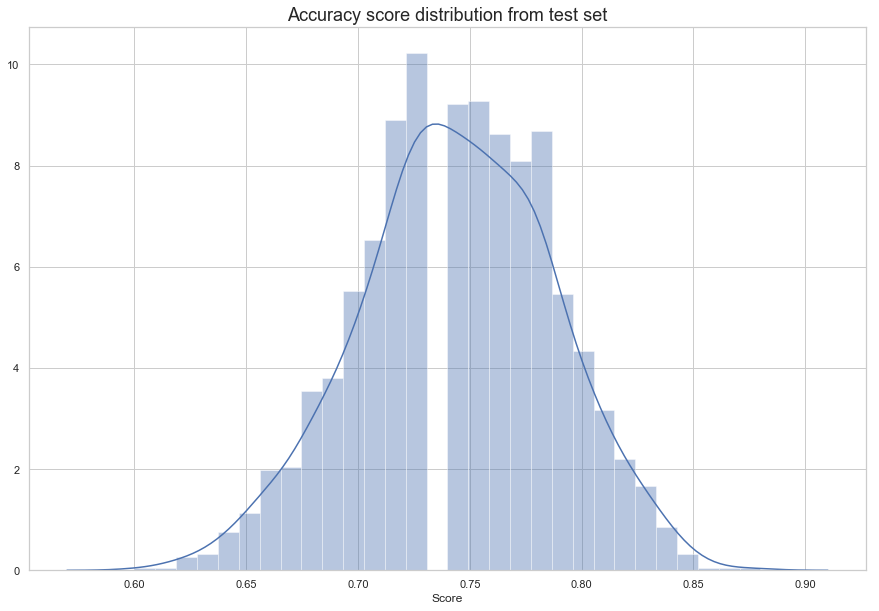

Average test score from random sampling: 0.7439049999999999
CV% of test score from random sampling: 5.835070859381091


In [106]:
bootstrapping('Random_forest', 'mean-z-score', index=index)

#### SVM_median-min-max

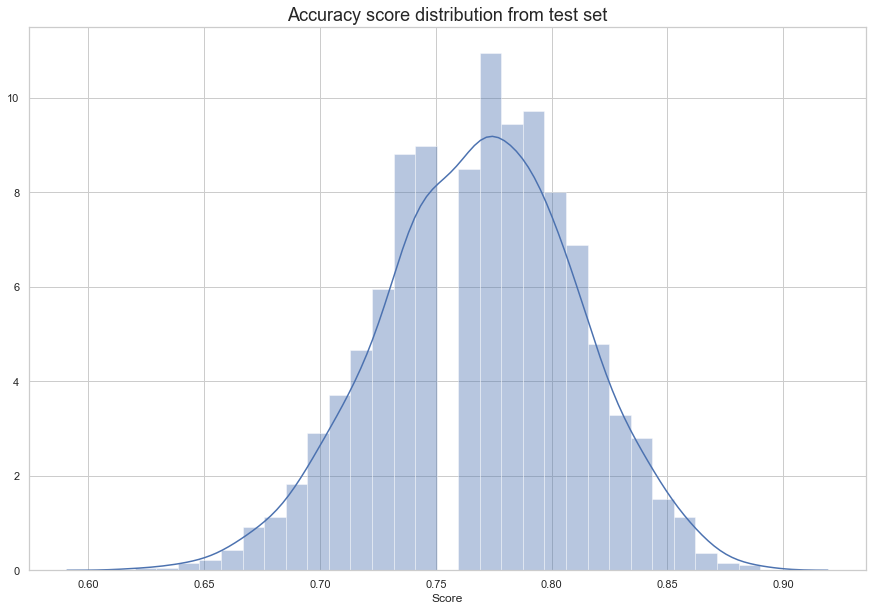

Average test score from random sampling: 0.7686099999999999
CV% of test score from random sampling: 5.481062470642016


In [107]:
bootstrapping('SVM', 'median-min-max', index=index)

#### SVM_mean-min-max

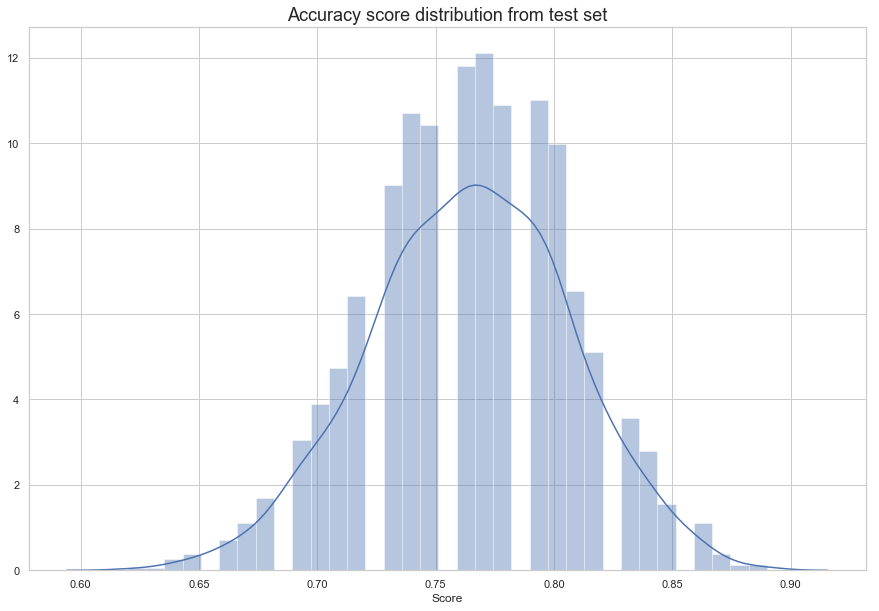

Average test score from random sampling: 0.764445
CV% of test score from random sampling: 5.551645176410778


In [108]:
bootstrapping('SVM', 'mean-min-max', index=index)

#### Gradient_boosting_median-z-score	

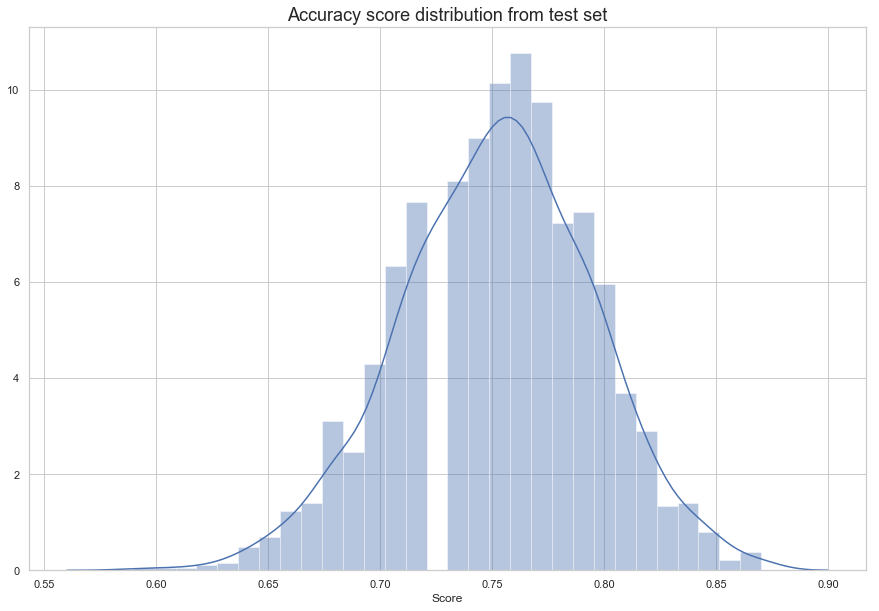

Average test score from random sampling: 0.7519049999999999
CV% of test score from random sampling: 5.697614232557526


In [109]:
bootstrapping('Gradient_boosting', 'median-z-score', index=index)

### Conclusions
In this notebook, we have used the accuracy as for our evaluation metric to find out the best model, we first use the training set and cross validation method to find out the best hyperparameters and algorithms/data combination, then we picked the top performers in each algorithms and use them on the test set, further filter out the top models and use the bootstrapping to see the consistency of out-of-sample performance by random sampling, we have found:
1. Ensemble model like random forest and graident boosting have better performance in general, however the required amount of time to train is much longer than the other simpler models, this can be a disadvantage in big data regime
2. PCA method seems to have no help in improving model performance, this could be due to the lost of explained variance from the original data
3. When testing the out-of-sample performance and consistency using bootstrapping, there did not seem to exist too much difference between the top performers we filtered out from the test set accuracy score
4. Since the model fitting time is pretty critical as well, we will select `SVM_median-min-max` to be our best model in this notebook, since the average model traning time is 0.007sec, a lot lower than the other top performers, and the average score, consistency are also comparable with the other top performers